In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append('/home/galina/PythonProjects/common_functions')
import peptides as pep

# from matplotlib.patches import Rectangle

% matplotlib inline

In [2]:
data = pd.read_csv('a-Myc dIm and dR RT Endpoints.csv')
data['Grid Index'] = data.index
data.rename(columns = {'Label' : 'Peptide'}, inplace = True)

data['Peptide Weight'] = data['Peptide'].map(pep.weight)
data['Peptide Length'] = data['Peptide'].map(lambda x : len(str(x)))

data.head()

,Peptide,dIm Baseline Noise,dIm Association Mean,dIm Dissociation Mean,dIm Association SNR,dR Baseline Noise,dR Association Mean,dR Dissociation Mean,dR Association SNR,Grid Index,Peptide Weight,Peptide Length
0,WTHPQFAT,0.000052,0.000085,0.000006,1.627223,0.000192,0.000171,0.000144,0.890100,0,987.083,8
1,WTHPQFAT,0.000039,-0.000192,-0.000059,-4.932830,0.000168,0.000510,0.000080,3.042561,1,987.083,8
2,WTHLQFAT,0.000041,0.000019,-0.000035,0.455528,0.000120,-0.000173,-0.000223,-1.443795,2,1003.126,8
3,NGQFQVWIPLAQK,0.000059,0.000539,0.000386,9.133257,0.000216,0.000236,0.000093,1.097186,3,1528.777,13
4,LQLHPQAGK,0.000037,0.000085,0.000094,2.277658,0.000239,0.000418,0.000032,1.747147,4,991.160,9


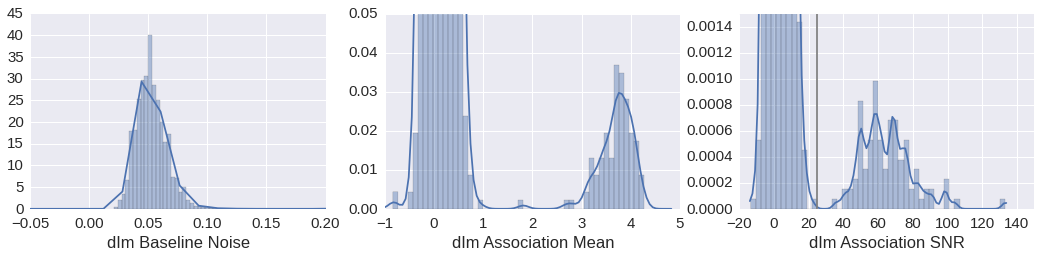

In [13]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (18, 3.5))
snr = 25

plt.subplot(1,3,1)
sns.distplot(data['dIm Baseline Noise']*1000, bins = 150)
plt.xlim((-0.05, 0.2))

plt.subplot(1,3,2)
sns.distplot(data['dIm Association Mean']*1000, bins = 50)
plt.xlim((-1, 5))
plt.ylim((0, 0.05))


plt.subplot(1,3,3)
sns.distplot(data['dIm Association SNR'], bins = 50)
plt.axvline(x = snr, color = 'grey')
plt.xlim((-20, 150))
plt.ylim((0, 0.0015))
plt.show()

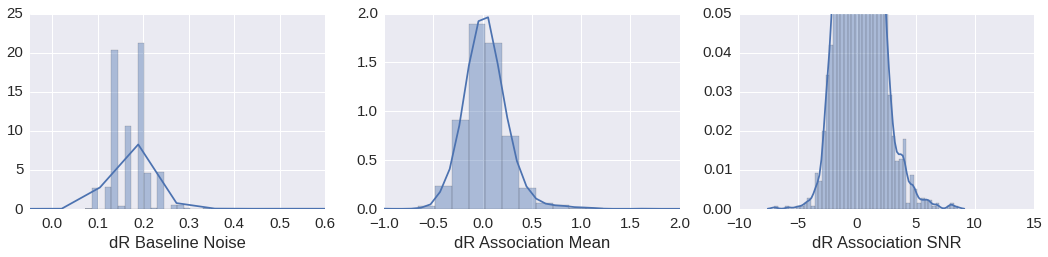

In [4]:
plt.figure(figsize = (18, 3.5))

plt.subplot(1,3,1)
sns.distplot(data['dR Baseline Noise']*1000, bins = 500)
plt.xlim((-0.05, 0.6))

plt.subplot(1,3,2)
sns.distplot(data['dR Association Mean']*1000, bins = 50)
plt.xlim((-1, 2))

plt.subplot(1,3,3)
sns.distplot(data['dR Association SNR'], bins = 50)
plt.xlim((-10, 15))
plt.ylim((0, 0.05))
plt.show()

In [5]:
dIm_noise = 0.1 * 10**-3
dR_noise  = 0.3 * 10**-3

print sum(data['dIm Baseline Noise'] > dIm_noise)
print sum(data['dR Baseline Noise']  > dR_noise)

25
35


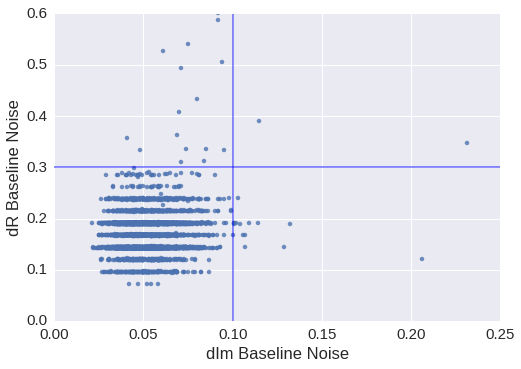

In [6]:
sns.regplot(data['dIm Baseline Noise'] * 1000,
            data['dR Baseline Noise'] * 1000, fit_reg = False)
plt.xlim((0, 0.25))
plt.ylim((0, 0.6))
plt.axvline(x = dIm_noise * 1000, alpha = 0.5)
plt.axhline(y = dR_noise * 1000, alpha = 0.5)

In [7]:
mask = (data['dIm Baseline Noise'] < dIm_noise) & (data['dR Baseline Noise'] < dR_noise)

data_masked = data[mask]
data_masked['Reacted'] = (data_masked['dIm Association SNR'] > snr)
sum(~mask)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


51

In [8]:
# tmp1 = data.sort(columns = 'dIm Baseline Noise',
#                  ascending = False)[['Grid Index', 'Peptide', 'dIm Baseline Noise']].reset_index(drop = True)
# tmp2 = data.sort(columns = 'dR Baseline Noise',
#                  ascending = False)[['Grid Index', 'Peptide', 'dR Baseline Noise']].reset_index(drop = True)
# pd.concat([tmp1, tmp2], axis = 1, ignore_index = True).head(10)

# a-Myc dIm EP vs dR RT

SNR is calculated for dIm signal


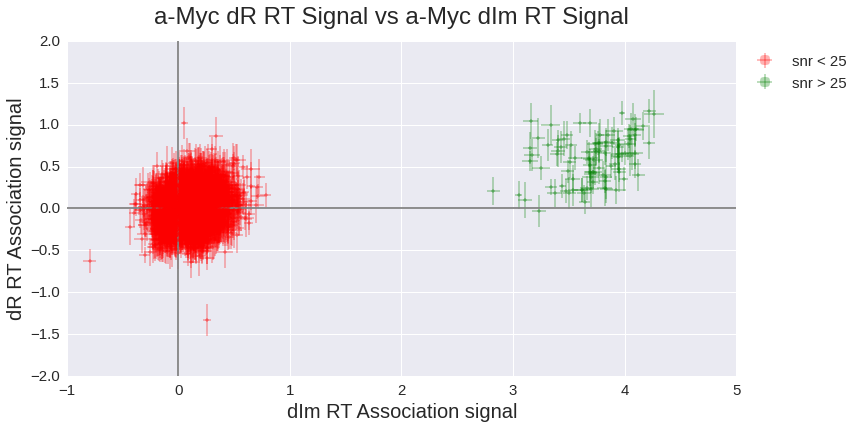

In [9]:
plt.figure(figsize = (12, 6))
plt.suptitle('a-Myc dR RT Signal vs a-Myc dIm RT Signal', fontsize = 24)

data_pos = data_masked[data_masked['Reacted']]
data_neg = data_masked[~data_masked['Reacted']]

plt.axvline(x = 0, color = 'grey')
plt.axhline(y = 0, color = 'grey')

plt.errorbar(x = data_neg['dIm Association Mean'] * 1000,
             y = data_neg['dR Association Mean'] * 1000,
             xerr = data_neg['dIm Baseline Noise'] * 1000,
             yerr = data_neg['dR Baseline Noise'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.3,
             label = 'snr < ' + str(snr),
             color = 'red')

plt.errorbar(x = data_pos['dIm Association Mean'] * 1000,
             y = data_pos['dR Association Mean'] * 1000,
             xerr = data_pos['dIm Baseline Noise'] * 1000,
             yerr = data_pos['dR Baseline Noise'] * 1000,
             marker = '.',
             linestyle = '',
             alpha = 0.3,
             label = 'snr > ' + str(snr),
             color = 'green')

plt.legend(markerscale = 3, bbox_to_anchor = (1, 1), loc = 'upper left')
plt.xlim((-1, 5))
plt.ylim((-2, 2))


plt.xlabel('dIm RT Association signal', fontsize = 20)
plt.ylabel('dR RT Association signal', fontsize = 20)
print 'SNR is calculated for dIm signal'

SNR is calculated for dIm signal


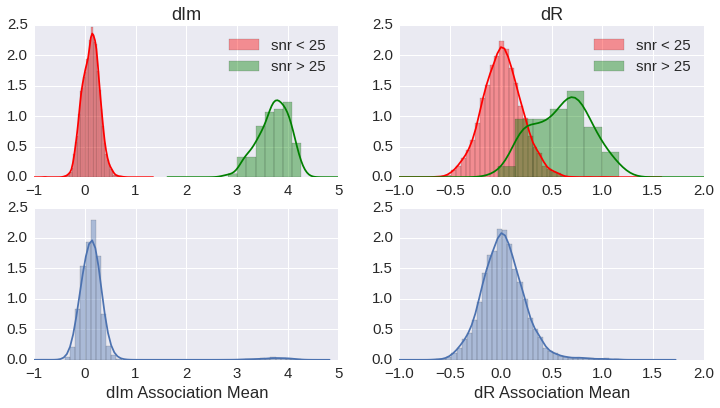

In [10]:
plt.figure(figsize = (12, 6))

plt.subplot(2,2,1)
plt.title('dIm')
sns.distplot(data_neg['dIm Association Mean'] * 1000, color = 'red', label = 'snr < ' + str(snr))
sns.distplot(data_pos['dIm Association Mean'] * 1000, color = 'green', label = 'snr > ' + str(snr))
plt.xlabel('')
plt.xlim((-1, 5))
plt.legend()

plt.subplot(2,2,3)
sns.distplot(data_masked['dIm Association Mean'] * 1000)
plt.xlim((-1, 5))

plt.subplot(2,2,2)
plt.title('dR')
sns.distplot(data_neg['dR Association Mean'] * 1000, color = 'red', label = 'snr < ' + str(snr))
sns.distplot(data_pos['dR Association Mean'] * 1000, color = 'green', label = 'snr > ' + str(snr))
plt.xlim((-1, 2))
plt.legend()
plt.xlabel('')

plt.subplot(2,2,4)
sns.distplot(data_masked['dR Association Mean'] * 1000)
plt.xlim((-1, 2))

print 'SNR is calculated for dIm signal'